In [1]:
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading toronto-emotional-speech-set-tess.zip to .\toronto-emotional-speech-set-tess


100%|██████████| 428M/428M [15:50<00:00, 472kB/s]  


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
%matplotlib inline

In [8]:
folder_path="D:/speech_recognition/tess/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
x= os.listdir(folder_path)
emotion=[]
file_path=[]



for i in x:
    fname = os.listdir(folder_path + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        file_path.append(folder_path + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['emotion'])
TESS_df = pd.concat([TESS_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)


In [9]:
TESS_df

,emotion,path
0,angry,D:/speech_recognition/tess/toronto-emotional-s...
1,angry,D:/speech_recognition/tess/toronto-emotional-s...
2,angry,D:/speech_recognition/tess/toronto-emotional-s...
3,angry,D:/speech_recognition/tess/toronto-emotional-s...
4,angry,D:/speech_recognition/tess/toronto-emotional-s...
...,...,...
2795,sad,D:/speech_recognition/tess/toronto-emotional-s...
2796,sad,D:/speech_recognition/tess/toronto-emotional-s...
2797,sad,D:/speech_recognition/tess/toronto-emotional-s...
2798,sad,D:/speech_recognition/tess/toronto-emotional-s...


<AxesSubplot: >

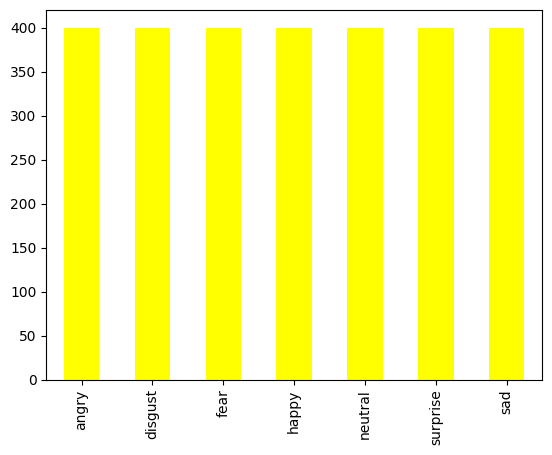

In [10]:
TESS_df.emotion.value_counts().plot(kind='bar', color='yellow')

In [11]:
import librosa

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [12]:
def extract_features(data,sample_rate):
    
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) 

    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data,sample_rate )
    result = np.vstack((result, res2)) 
    
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3))
    
    return result

In [14]:
X, Y = [], []
for path, emotion in zip(TESS_df.path, TESS_df.emotion):
    features = get_features(path)
    for i in features:
        X.append(i)
        Y.append(emotion)

C:\Users\Manav\AppData\Local\Temp\ipykernel_17784\1313063952.py:9: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\Manav\AppData\Local\Temp\ipykernel_17784\1313063952.py:16: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


In [15]:
import librosa.display
from IPython.display import Audio
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

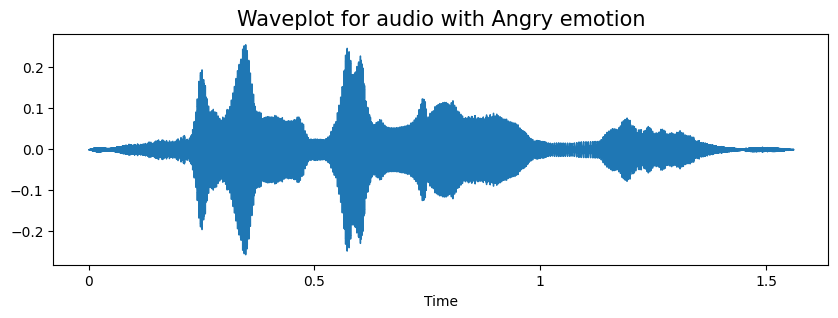

In [18]:
emotion='Angry'
path = 'D:/speech_recognition/tess/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_week_angry.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

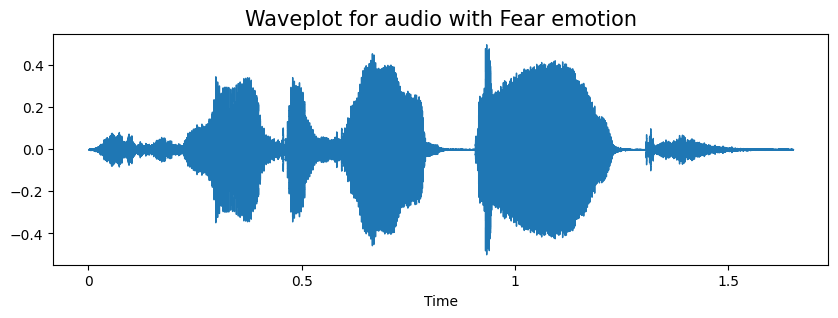

In [19]:
emotion='Fear'
path = 'D:/speech_recognition/tess/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_back_fear.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

In [20]:
TESS_df = pd.DataFrame(X)
TESS_df['emotion'] = Y
TESS_df.to_csv('features.csv', index=False)
TESS_df

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,emotion
0,0.054723,0.539152,0.596994,0.396454,0.362415,0.434596,0.412372,0.373666,0.568295,0.573150,...,0.000105,0.000157,0.000185,0.000132,0.000124,0.000046,0.000008,8.316040e-07,5.121199e-08,angry
1,0.247928,0.767715,0.689971,0.560404,0.598954,0.671872,0.518103,0.537878,0.719311,0.618433,...,0.004058,0.004183,0.004037,0.004114,0.004301,0.003965,0.004099,3.808121e-03,4.057655e-03,angry
2,0.073309,0.544492,0.592787,0.373489,0.329619,0.384495,0.397886,0.296854,0.534783,0.623375,...,0.000027,0.000026,0.000025,0.000036,0.000039,0.000027,0.000005,1.741293e-07,1.262477e-08,angry
3,0.057828,0.636774,0.408000,0.371217,0.400934,0.506038,0.456958,0.396689,0.422794,0.354561,...,0.000115,0.000082,0.000030,0.000010,0.000013,0.000013,0.000004,4.396097e-07,5.493137e-09,angry
4,0.246959,0.787365,0.741994,0.602982,0.578656,0.595975,0.575777,0.477737,0.509813,0.519459,...,0.002963,0.002716,0.002249,0.002461,0.002882,0.002682,0.002385,2.371273e-03,2.476705e-03,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,0.102513,0.462950,0.421415,0.366908,0.395144,0.403083,0.491944,0.534958,0.492875,0.600657,...,0.000308,0.000320,0.000328,0.000325,0.000338,0.000303,0.000260,2.782024e-04,2.732206e-04,sad
8396,0.041078,0.337384,0.407169,0.306235,0.244550,0.271762,0.285933,0.443825,0.483221,0.446568,...,0.000012,0.000010,0.000012,0.000020,0.000025,0.000015,0.000006,5.140363e-07,2.050351e-07,sad
8397,0.081239,0.432026,0.468534,0.369244,0.376085,0.349071,0.427626,0.484344,0.483444,0.595032,...,0.000148,0.000162,0.000151,0.000180,0.000169,0.000072,0.000019,1.796400e-06,2.798260e-07,sad
8398,0.134607,0.524680,0.509612,0.454358,0.469797,0.459890,0.522912,0.524047,0.589660,0.624642,...,0.000528,0.000563,0.000557,0.000592,0.000555,0.000490,0.000439,4.004644e-04,3.659268e-04,sad


In [22]:
from sklearn.model_selection import train_test_split
X = TESS_df.drop(['emotion'], axis=1)
feature_names = list(X.columns)
X = X.values
labels = np.sort(np.unique(TESS_df.emotion.values))
index = {}
val = {}
for i, j in enumerate(labels):
    index[j] = i
    val[i] = j
y = np.array([index[x] for x in TESS_df.emotion.values])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svclassifier = SVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
acc = float(accuracy_score(y_test,y_pred))*100
print("Accuracy Score is:", acc)

Accuracy Score is: 76.76190476190476


c:\Users\Manav\anaconda3\envs\tf2.11\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


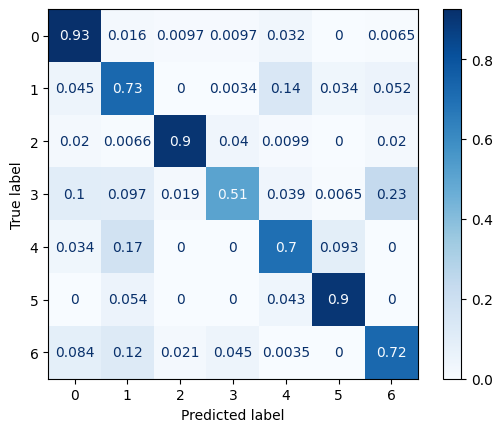

In [24]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(svclassifier,X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.show(matrix)
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc = float(accuracy_score(y_test,y_pred))*100
print("Accuracy Score is:", acc)

Accuracy Score is: 90.47619047619048


c:\Users\Manav\anaconda3\envs\tf2.11\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


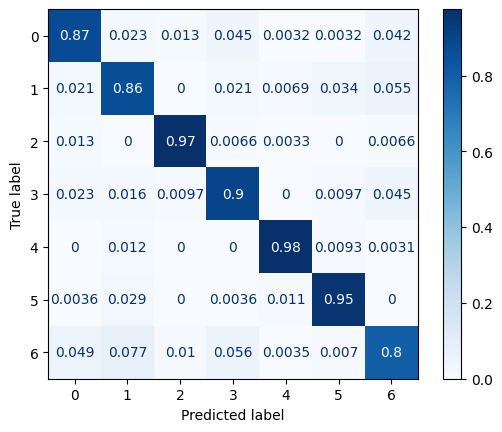

In [26]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(decision_tree,X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.show(matrix)
plt.show()

In [27]:
import keras
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical 

In [28]:
X = TESS_df.iloc[: ,:-1].values
Y = TESS_df['emotion'].values

In [29]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162), (6300, 7), (2100, 162), (2100, 7))

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162), (6300, 7), (2100, 162), (2100, 7))

In [32]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162, 1), (6300, 7), (2100, 162, 1), (2100, 7))

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(loss = tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"), tf.keras.metrics.BinaryAccuracy(name="accuracy")], optimizer = tf.keras.optimizers.Adam(1e-4))

In [34]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', mode='max', verbose=1)
history= model.fit(x_train, y_train, epochs = 20, batch_size = 32, callbacks=[callback])

Epoch 1/20
197/197 [==============================] - ETA: 0s - loss: 0.1248 - rmse: 0.3533 - accuracy: 0.8571
Epoch 1: saving model to best_model.h5
197/197 [==============================] - 85s 394ms/step - loss: 0.1248 - rmse: 0.3533 - accuracy: 0.8571
Epoch 2/20
197/197 [==============================] - ETA: 0s - loss: 0.1228 - rmse: 0.3504 - accuracy: 0.8571
Epoch 2: saving model to best_model.h5
197/197 [==============================] - 30s 153ms/step - loss: 0.1228 - rmse: 0.3504 - accuracy: 0.8571
Epoch 3/20
197/197 [==============================] - ETA: 0s - loss: 0.1227 - rmse: 0.3503 - accuracy: 0.8571
Epoch 3: saving model to best_model.h5
197/197 [==============================] - 29s 145ms/step - loss: 0.1227 - rmse: 0.3503 - accuracy: 0.8571
Epoch 4/20
197/197 [==============================] - ETA: 0s - loss: 0.1227 - rmse: 0.3502 - accuracy: 0.8571
Epoch 4: saving model to best_model.h5
197/197 [==============================] - 24s 120ms/step - loss: 0.1227 - rmse

In [35]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100,"%")

66/66 [==============================] - 3s 37ms/step - loss: 0.1224 - rmse: 0.3499 - accuracy: 0.8571
Test Loss: 0.12244915217161179
Test accuracy: 34.99273955821991 %


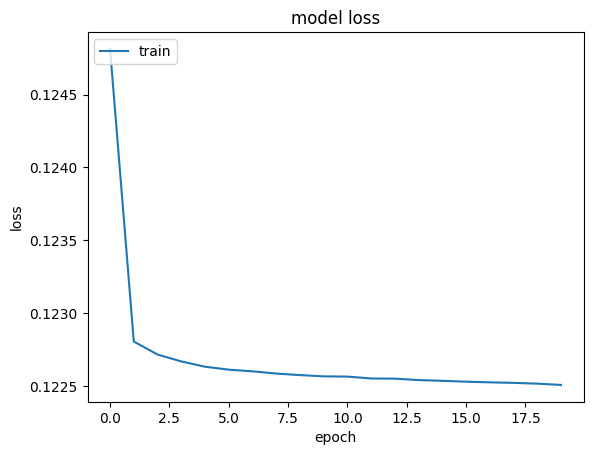

In [36]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

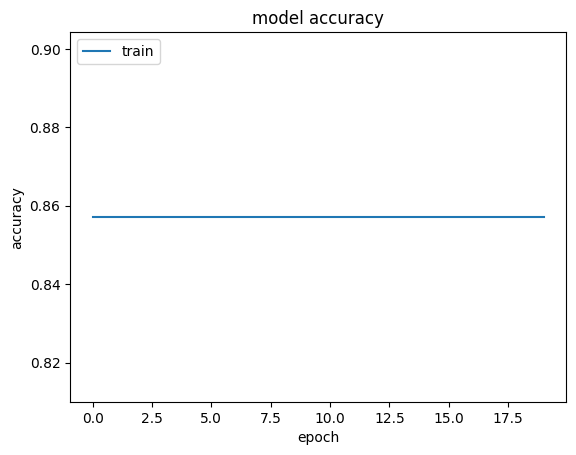

In [37]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()